[Sebastian Raschka](http://sebastianraschka.com), 2015

https://github.com/rasbt/python-machine-learning-book

# Python Machine Learning Essentials - Code Examples

# Chapter 4 - Building Good Training Sets – Data Pre-Processing

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [22]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p numpy,pandas,matplotlib,scikit-learn

ImportError: No module named watermark

In [23]:
# to install watermark just uncomment the following line:
#%install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py

<br>
<br>

### Overview

- [Dealing with missing data](#Dealing-with-missing-data)
  - [Eliminating samples or features with missing values](#Eliminating-samples-or-features-with-missing-values)
  - [Imputing missing values](#Imputing-missing-values)
  - [Understanding the scikit-learn estimator API](#Understanding-the-scikit-learn-estimator-API)
- [Handling categorical data](#Handling-categorical-data)
  - [Mapping ordinal features](#Mapping-ordinal-features)
  - [Encoding class labels](#Encoding-class-labels)
  - [Performing one-hot encoding on nominal features](#Performing-one-hot-encoding-on-nominal-features)
- [Partitioning a dataset in training and test sets](#Partitioning-a-dataset-in-training-and-test-sets)
- [Bringing features onto the same scale](#Bringing-features-onto-the-same-scale)
- [Selecting meaningful features](#Selecting-meaningful-features)
  - [Sparse solutions with L1 regularization](#Sparse-solutions-with-L1-regularization)
  - [Sequential feature selection algorithms](#Sequential-feature-selection-algorithms)
- [Assessing feature importance with random forests](#Assessing-feature-importance-with-random-forests)
- [Summary](#Summary)

<br>
<br>

In [24]:
from IPython.display import Image

# Dealing with missing data

In [25]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:
# csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

TypeError: initial_value must be unicode or None, not str

In [26]:
df.isnull().sum()

NameError: name 'df' is not defined

<br>
<br>

## Eliminating samples or features with missing values

In [27]:
df.dropna()

NameError: name 'df' is not defined

In [28]:
df.dropna(axis=1)

NameError: name 'df' is not defined

In [29]:
# only drop rows where all columns are NaN
df.dropna(how='all')  

NameError: name 'df' is not defined

In [30]:
# drop rows that have not at least 4 non-NaN values
df.dropna(thresh=4)

NameError: name 'df' is not defined

In [31]:
# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

NameError: name 'df' is not defined

<br>
<br>

## Imputing missing values

In [32]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

NameError: name 'df' is not defined

In [33]:
df.values

NameError: name 'df' is not defined

<br>
<br>

## Understanding the scikit-learn estimator API

In [34]:
Image(filename='./images/04_04.png', width=400) 

IOError: [Errno 2] No such file or directory: u'./images/04_04.png'

In [35]:
Image(filename='./images/04_05.png', width=400) 

IOError: [Errno 2] No such file or directory: u'./images/04_05.png'

<br>
<br>

# Handling categorical data

In [36]:
import pandas as pd
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'], 
            ['red', 'L', 13.5, 'class2'], 
            ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


<br>
<br>

## Mapping ordinal features

In [37]:
size_mapping = {
           'XL': 3,
           'L': 2,
           'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [38]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

<br>
<br>

## Encoding class labels

In [39]:
import numpy as np

class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [40]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [41]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [42]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [43]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

<br>
<br>

## Performing one-hot encoding on nominal features

In [44]:
X = df[['color', 'size', 'price']].values

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [45]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [46]:
pd.get_dummies(df[['price', 'color', 'size']])

,color,price,size
0,0,1,0
1,1,0,0
2,0,0,1


<br>
<br>

# Partitioning a dataset in training and test sets

In [47]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

('Class labels', array([1, 2, 3]))


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<hr>

### Note:


If the link to the Wine dataset provided above does not work for you, you can find a local copy in this repository at [./../datasets/wine/wine.data](./../datasets/wine.data).

Or you could fetch it via


In [48]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<hr>

In [73]:
from sklearn.cross_validation import train_test_split

# Load features

import pickle
language = 'english'
year = '2015'
#datapath = 'data/pan16-author-profiling-training-dataset-'+language+'-'+year+'-02-29/'
datapath = 'data/pan15-author-profiling-training-dataset-'+language+'-'+year+'-04-23/'
with open(datapath+'data/tag_count.p', 'rb') as tagfile:
    tag_count = pickle.load(tagfile)
with open(datapath+'data/gender.p', 'rb') as genderfile:
    gender = pickle.load(genderfile)
with open(datapath+'data/age.p', 'rb') as agefile:
    age = pickle.load(agefile)

pos_tags = []
for post in tag_count: 
    for tag in post:
        if tag[0] not in pos_tags:
            pos_tags.append(tag[0])
print pos_tags

complete_tag_count = []
for post in tag_count:
    p = dict(post)
    for pos in pos_tags:
        if pos not in p:
            post.append((pos, 0))
    post = sorted(post)
    complete_tag_count.append([i[1] for i in post])
    
tag_total = np.array(complete_tag_count)
gender_total = np.array(gender)
age_total = np.array(age)
    
X_train, X_test, y_train, y_test = \
        train_test_split(tag_total, gender_total, test_size=0.3, random_state=0)

[u'PRP$', u'VBG', u'POS', u"''", u'NNP-PERS', u'WDT', 'JJ', u'WP', u'DT', u'#', u'"', u'RP', 'NN', u',', u'.', u'TO', u'PRP', 'RB', u':', 'VB', u'WRB', u'CC', u'PDT', u'CD', u'IN', u'MD', u'SYM', u'UH', 'CAPS', 'ELONGATED', '!', '?', 'OMG', '<3', 'lol', 'lmfao', 'EMOTCOUNT', 'EMOTSCORE', '@COUNT', '#COUNT', 'RT', 'URL', 'PIC', 'TEXTLEN', 'WORDLEN', 'EXTRAV', 'GFCOUNT', 'BFCOUNT', 'MALRAT', 'FEMRAT', 'GLEX', 'ALEX', u'FW', u'NNP-ORG', u')', u'(', u'EX', u'NNPS', u'$', u'NN|NNS', u'LS', u'NNPS-LOC', u'WP$', u'``']


In [74]:
X1, y1 = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train1, X_test1, y_train1, y_test1 = \
        train_test_split(X1, y1, test_size=0.3, random_state=0)

In [75]:
print X_train1

[[  1.37100000e+01   1.86000000e+00   2.36000000e+00 ...,   1.11000000e+00
    4.00000000e+00   1.03500000e+03]
 [  1.22200000e+01   1.29000000e+00   1.94000000e+00 ...,   8.60000000e-01
    3.02000000e+00   3.12000000e+02]
 [  1.32700000e+01   4.28000000e+00   2.26000000e+00 ...,   5.90000000e-01
    1.56000000e+00   8.35000000e+02]
 ..., 
 [  1.24200000e+01   1.61000000e+00   2.19000000e+00 ...,   1.06000000e+00
    2.96000000e+00   3.45000000e+02]
 [  1.39000000e+01   1.68000000e+00   2.12000000e+00 ...,   9.10000000e-01
    3.33000000e+00   9.85000000e+02]
 [  1.41600000e+01   2.51000000e+00   2.48000000e+00 ...,   6.20000000e-01
    1.71000000e+00   6.60000000e+02]]


<br>
<br>

# Bringing features onto the same scale

In [94]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
X_train_norm1 = mms.fit_transform(X_train1)
X_test_norm1 = mms.transform(X_test1)

In [95]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_train_std1 = stdsc.fit_transform(X_train1)
X_test_std1 = stdsc.transform(X_test1)

In [106]:
print y_train
print y_test
print y_train1
print y_test1

['M' 'F' 'F' 'M' 'F' 'F' 'F' 'M' 'M' 'F' 'M' 'M' 'F' 'M' 'M' 'M' 'M' 'F'
 'M' 'M' 'F' 'M' 'F' 'M' 'M' 'F' 'M' 'F' 'M' 'F' 'M' 'M' 'M' 'M' 'M' 'F'
 'F' 'F' 'M' 'M' 'M' 'F' 'F' 'M' 'M' 'F' 'M' 'F' 'F' 'M' 'M' 'F' 'M' 'M'
 'F' 'F' 'M' 'M' 'M' 'F' 'F' 'F' 'M' 'F' 'F' 'F' 'M' 'M' 'M' 'M' 'F' 'M'
 'F' 'F' 'F' 'F' 'F' 'M' 'M' 'F' 'M' 'F' 'M' 'M' 'F' 'F' 'M' 'M' 'F' 'M'
 'M' 'M' 'F' 'M' 'M' 'F' 'F' 'F' 'F' 'M' 'F' 'M' 'F' 'M' 'M' 'F']
['F' 'F' 'F' 'M' 'F' 'M' 'F' 'F' 'F' 'F' 'M' 'M' 'F' 'F' 'F' 'F' 'F' 'M'
 'F' 'F' 'F' 'M' 'M' 'M' 'M' 'F' 'M' 'F' 'M' 'M' 'M' 'F' 'F' 'F' 'M' 'F'
 'M' 'M' 'M' 'F' 'F' 'F' 'M' 'M' 'F' 'F']
[1 2 3 3 2 3 3 1 2 3 2 2 3 2 1 2 2 2 1 1 2 2 3 3 2 2 2 3 3 1 3 2 2 2 2 2 1
 1 2 1 3 1 3 1 1 2 1 2 2 1 3 2 1 2 2 2 3 1 3 3 1 1 2 3 1 1 2 2 1 1 1 3 2 1
 2 3 1 2 3 3 1 1 3 1 3 2 1 1 2 1 3 2 3 1 3 3 3 1 2 2 2 2 3 3 2 2 1 2 3 3 1
 1 3 2 2 2 1 1 1 2 2 2 1 3]
[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1 3
 2 2 3 1 1 2 2 2 1 3 2 3 1 3 3 1 3]


A visual example:

In [97]:
ex = pd.DataFrame([0, 1, 2 ,3, 4, 5])

# standardize
ex[1] = (ex[0] - ex[0].mean()) / ex[0].std()
# normalize
ex[2] = (ex[0] - ex[0].min()) / (ex[0].max() - ex[0].min())
ex.columns = ['input', 'standardized', 'normalized']
ex

,input,standardized,normalized
0,0,-1.336306,0.0
1,1,-0.801784,0.2
2,2,-0.267261,0.4
3,3,0.267261,0.6
4,4,0.801784,0.8
5,5,1.336306,1.0


<br>
<br>

# Selecting meaningful features

...

## Sparse solutions with L1-regularization

In [98]:
Image(filename='./images/04_12.png', width=500) 

IOError: [Errno 2] No such file or directory: u'./images/04_12.png'

In [99]:
Image(filename='./images/04_13.png', width=500) 

IOError: [Errno 2] No such file or directory: u'./images/04_13.png'

In [100]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

lr1 = LogisticRegression(penalty='l1', C=0.1)
lr1.fit(X_train_std1, y_train1)
print('Training accuracy:', lr1.score(X_train_std1, y_train1))
print('Test accuracy:', lr1.score(X_test_std1, y_test1))


('Training accuracy:', 0.79245283018867929)
('Test accuracy:', 0.60869565217391308)
('Training accuracy:', 0.9838709677419355)
('Test accuracy:', 0.98148148148148151)


In [101]:
print lr.intercept_
print lr1.intercept_

[ 0.]
[-0.38378694 -0.15812369 -0.70042568]


In [84]:
print lr.coef_
print lr1.coef_

[[-0.51644178  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.07606097  0.          0.
   0.          0.          0.          0.          0.          0.03835104
   0.         -0.60494261  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[[ 0.28002784  0.          0.         -0.02791478  0.          0.
   0.71001079  0.          0.          0.          0.          0.
   1.23669626]
 [-0.6439104  -0.06883074 -0.05719626  0.          0.          0.          0.
   0.          0.         -0.92693496  0.0600573 

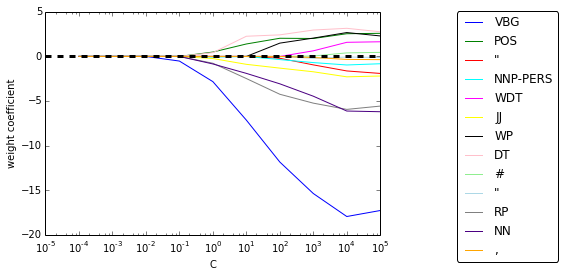

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
         'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)

    
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=pos_tags[column+1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
# plt.savefig('./figures/l1_path.png', dpi=300)
plt.show()

<br>
<br>

## Sequential feature selection algorithms

In [112]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63) 64
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63) 63
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 58, 59, 60, 61, 62, 63) 62
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 59, 60, 61, 62, 63) 61
(0, 1, 2, 3, 4, 5, 6, 7,

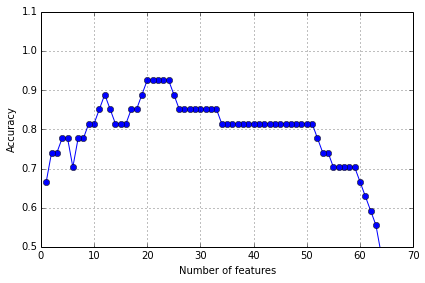

In [136]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=2)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]
for i in sbs.subsets_:
    print i, len(i)

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.5, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('./sbs.png', dpi=300)
plt.show()

In [142]:
tag_total = np.array(complete_tag_count)
gender_total = np.array(gender)
age_total = np.array(age)

#remove_index = pos_tags.index('EXTRAV')
remove_index = [3,4,8,9,11,12,14,15,18,19,20,22,23,24,25,26,29,31,32,33,34,35,36,37,38,39,41,42,44,47,48,49,
                50,52,53,54,55,56,57,58,59,60,61,62]
filtered_tags = np.zeros(shape=(len(tag_total),20))
for t in range(0, len(tag_total)-1):
    filtered_tags[t] = np.delete(tag_total[t], remove_index)
tag_total = filtered_tags

In [144]:
from sklearn import cross_validation, svm, linear_model, tree, ensemble, naive_bayes, neighbors, gaussian_process, grid_search
from sklearn.multiclass import OneVsRestClassifier

#features_total = np.array(features)

predicted_class = gender_total # gender_total, age_total

clf1 = linear_model.LogisticRegression()
clf2 = ensemble.RandomForestClassifier(n_estimators=100)
clf3 = tree.DecisionTreeClassifier(max_depth=3)
clf4 = svm.SVC(kernel='linear', probability=True, C=0.05)
clf5 = naive_bayes.GaussianNB()
clf6 = naive_bayes.BernoulliNB()
clf7 = ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf8 = ensemble.AdaBoostClassifier(n_estimators=100)
clf9 = OneVsRestClassifier(clf4)

eclf = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3), ('kn', clf4),
                                             ('svcl', clf5), ('gnb', clf6), ('gbc', clf7), ('ada', clf8), ('multi', clf9)], voting='soft')
eclf2 = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3), ('kn', clf4),
                                             ('svcl', clf5), ('gnb', clf6), ('gbc', clf7), ('ada', clf8), ('multi', clf9)], voting='hard')

In [ ]:
cv = cross_validation.KFold(tag_total.shape[0], 3)

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, eclf, eclf2], ['Logistic Regression', 'Random Forest',
    'Decision Tree', 'SVC Linear','Gaussian NB', 'Bernoulli NB', 'Gradient Boosting Classifier', 'AdaBoost', 'One vs Rest', 
    'Soft Voting Ensemble', 'Hard Voting Ensemble']):
    scores = cross_validation.cross_val_score(clf, tag_total, predicted_class, cv=cv, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.71 (+/- 0.02) [Logistic Regression]
Accuracy: 0.76 (+/- 0.01) [Random Forest]
Accuracy: 0.72 (+/- 0.09) [Decision Tree]
Accuracy: 0.72 (+/- 0.01) [SVC Linear]
Accuracy: 0.66 (+/- 0.04) [Gaussian NB]
Accuracy: 0.70 (+/- 0.03) [Bernoulli NB]
Accuracy: 0.72 (+/- 0.01) [Gradient Boosting Classifier]
Accuracy: 0.67 (+/- 0.02) [AdaBoost]
Accuracy: 0.72 (+/- 0.01) [One vs Rest]

In [116]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

IndexError: index 13 is out of bounds for axis 1 with size 13

In [117]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

('Training accuracy:', 0.85849056603773588)
('Test accuracy:', 0.63043478260869568)


In [118]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

('Training accuracy:', 0.87735849056603776)
('Test accuracy:', 0.63043478260869568)


<br>
<br>

# Assessing Feature Importances with Random Forests

 1) PRP$                           0.103043
 2) CAPS                           0.082255
 3) :                              0.037759
 4) EXTRAV                         0.037744
 5) SYM                            0.031255
 6) WP                             0.023960
 7) #                              0.023788
 8) DT                             0.023195
 9) POS                            0.021160
10) PDT                            0.020281
11) ''                             0.020097
12) IN                             0.019884
13) VBG                            0.019564
14) ,                              0.019543
15) lol                            0.018995
16) WORDLEN                        0.017803
17) FW                             0.017643
18) NNP-ORG                        0.017351
19) GFCOUNT                        0.017321
20) ELONGATED                      0.016889
21) LS                             0.016494
22) WRB                            0.015770
23) VB                          

TypeError: only integer arrays with one element can be converted to an index

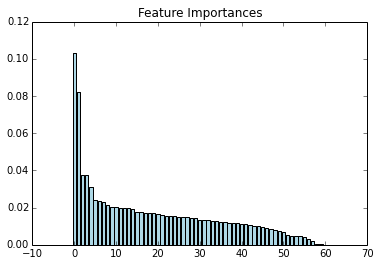

In [124]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = pos_tags

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [128]:
X_selected = forest.transform(X_train, threshold=0.03)
X_selected.shape

/usr/local/lib/python2.7/dist-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(106, 5)

<br>
<br>

# Summary

...